<a href="https://colab.research.google.com/github/meryam12/Unsupervised_learning_mini_projet/blob/main/Unsupervised_learning_mini_projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount your drive
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import os
os.chdir('drive/My Drive/PROJET')
!ls

BordeauxWines.csv  vin1.csv  vin.csv


In [ ]:
#Lecture de données
from pandas import read_csv
import pandas as pd
import numpy as np

pd.read_csv('BordeauxWines.csv')

,Wine,Year,Score,Price,BLOOD ORANGE,CITRUS,CITRUS PEEL,CITRUS ZEST,CLEMENTINE,LIME,GRAPEFRUIT,GRAPEFRUIT PEEL,ORANGE,KEY LIME,LEMON,LEMON MOUSSE,LEMON PEEL,LEMON SEED,LEMON ZEST,LEMON-LIME,LIME PEEL,MARMALADE,ORANGE CREAM,ORANGE PEEL,ORANGE ZEST,RED GRAPEFRUIT,TANGERINE,ACAI BERRY,BERRY,BILBERRY,BLACK CURRANT,BLACK CURRANT CONFITURE,BLACK RASPBERRY,BLACKBERRY,BLACKBERRY CONFITURE,BLUEBERRY,BLUEBERRY CREAM,BOYSENBERRY,BRAMBLEBERRY,CRANBERRY,...,PENCIL LEAD,GRAPHITE,GUNFLINT,HOT EARTH,HUMUS,IODINE,MINERAL,MUSHROOM,PEBBLE,PETROL,PORCINI MUSHROOM,SALINE,SAUTEED WILD MUSHROOM,SLATE,STEEL,STONE,MOLDY,MOLDY CORK,DIESEL,KEROSENE,PLASTIC,SQUID INK,TAR,BURN,BURNT MATCH,CABBAGE,GARLIC,HYDROGEN SULFIDE,NATURAL GAS MERCAPTAN,RUBBERY,SKUNK,SULFUR DIOXIDE,"WET WOOL,WET DOG",ACETIC ACID,ETHANOL,ETHYL ACETATE,ALCOHOL,FROTH,MENTHOL,SHERRY
0,ChÃ¢teau Croix Figeac St.-Emilion,2008,84,$20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ChÃ¢teau Fonroque St.-Emilion,2008,84,$29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ChÃ¢teau Grand Bertin de St.-Clair MÃ©doc,2008,84,$NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ChÃ¢teau Lion Beaulieu Bordeaux White,2008,84,$NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ChÃ¢teau Marsau CÃ´tes de Francs,2008,84,$20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14344,ChÃ¢teau Ausone St.-Emilion Chapelle d'Ausone,2009,96,$NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14345,ChÃ¢teau Doisy DaÃ«ne Barsac L'Extravagant,2009,96,$NA/375ml,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14346,ChÃ¢teau L'Ã‰glise Clinet Pomerol,2009,98,$NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14347,Liber Pater Graves,2009,96,$NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.read_csv('BordeauxWines.csv')
df

,Wine,Year,Score,Price,BLOOD ORANGE,CITRUS,CITRUS PEEL,CITRUS ZEST,CLEMENTINE,LIME,GRAPEFRUIT,GRAPEFRUIT PEEL,ORANGE,KEY LIME,LEMON,LEMON MOUSSE,LEMON PEEL,LEMON SEED,LEMON ZEST,LEMON-LIME,LIME PEEL,MARMALADE,ORANGE CREAM,ORANGE PEEL,ORANGE ZEST,RED GRAPEFRUIT,TANGERINE,ACAI BERRY,BERRY,BILBERRY,BLACK CURRANT,BLACK CURRANT CONFITURE,BLACK RASPBERRY,BLACKBERRY,BLACKBERRY CONFITURE,BLUEBERRY,BLUEBERRY CREAM,BOYSENBERRY,BRAMBLEBERRY,CRANBERRY,...,PENCIL LEAD,GRAPHITE,GUNFLINT,HOT EARTH,HUMUS,IODINE,MINERAL,MUSHROOM,PEBBLE,PETROL,PORCINI MUSHROOM,SALINE,SAUTEED WILD MUSHROOM,SLATE,STEEL,STONE,MOLDY,MOLDY CORK,DIESEL,KEROSENE,PLASTIC,SQUID INK,TAR,BURN,BURNT MATCH,CABBAGE,GARLIC,HYDROGEN SULFIDE,NATURAL GAS MERCAPTAN,RUBBERY,SKUNK,SULFUR DIOXIDE,"WET WOOL,WET DOG",ACETIC ACID,ETHANOL,ETHYL ACETATE,ALCOHOL,FROTH,MENTHOL,SHERRY
0,ChÃ¢teau Croix Figeac St.-Emilion,2008,84,$20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ChÃ¢teau Fonroque St.-Emilion,2008,84,$29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ChÃ¢teau Grand Bertin de St.-Clair MÃ©doc,2008,84,$NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ChÃ¢teau Lion Beaulieu Bordeaux White,2008,84,$NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ChÃ¢teau Marsau CÃ´tes de Francs,2008,84,$20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14344,ChÃ¢teau Ausone St.-Emilion Chapelle d'Ausone,2009,96,$NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14345,ChÃ¢teau Doisy DaÃ«ne Barsac L'Extravagant,2009,96,$NA/375ml,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14346,ChÃ¢teau L'Ã‰glise Clinet Pomerol,2009,98,$NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14347,Liber Pater Graves,2009,96,$NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Supprimer les valeurs manquntes et les NA valeurs
df = df.loc[df['Price']!='$NA']
df= df.loc[df['Price']!='$NA/375ml']
df= df.loc[df['Price']!='$NA/500ml']
df= df.loc[df['Price']!='$NA/750ml']
df = df.loc[df['Price']!='NA']

In [ ]:
#Véridier s'il y a des NAN values
check_for_nan = df.isnull().values.any()
print (check_for_nan)

False


In [ ]:
df['Price'].str

In [ ]:
#Enlever le symbole dollard de la colonne Price

df['Price']= df['Price'].replace('[\$,]', '', regex=True)

In [ ]:
#Diviser la colonne Price en deux, prix et volume 
df[['Price','Volume par ml']] = df['Price'].str.split('/',expand=True)
df

,Wine,Year,Score,Price,BLOOD ORANGE,CITRUS,CITRUS PEEL,CITRUS ZEST,CLEMENTINE,LIME,GRAPEFRUIT,GRAPEFRUIT PEEL,ORANGE,KEY LIME,LEMON,LEMON MOUSSE,LEMON PEEL,LEMON SEED,LEMON ZEST,LEMON-LIME,LIME PEEL,MARMALADE,ORANGE CREAM,ORANGE PEEL,ORANGE ZEST,RED GRAPEFRUIT,TANGERINE,ACAI BERRY,BERRY,BILBERRY,BLACK CURRANT,BLACK CURRANT CONFITURE,BLACK RASPBERRY,BLACKBERRY,BLACKBERRY CONFITURE,BLUEBERRY,BLUEBERRY CREAM,BOYSENBERRY,BRAMBLEBERRY,CRANBERRY,...,GRAPHITE,GUNFLINT,HOT EARTH,HUMUS,IODINE,MINERAL,MUSHROOM,PEBBLE,PETROL,PORCINI MUSHROOM,SALINE,SAUTEED WILD MUSHROOM,SLATE,STEEL,STONE,MOLDY,MOLDY CORK,DIESEL,KEROSENE,PLASTIC,SQUID INK,TAR,BURN,BURNT MATCH,CABBAGE,GARLIC,HYDROGEN SULFIDE,NATURAL GAS MERCAPTAN,RUBBERY,SKUNK,SULFUR DIOXIDE,"WET WOOL,WET DOG",ACETIC ACID,ETHANOL,ETHYL ACETATE,ALCOHOL,FROTH,MENTHOL,SHERRY,Volume par ml
0,ChÃ¢teau Croix Figeac St.-Emilion,2008,84,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None
1,ChÃ¢teau Fonroque St.-Emilion,2008,84,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None
4,ChÃ¢teau Marsau CÃ´tes de Francs,2008,84,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None
7,ChÃ¢teau Subilaux Bordeaux,2008,84,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None
9,ChÃ¢teau Tour de Mirambeau Bordeaux White,2008,84,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14338,ChÃ¢teau Haut-Brion Pessac-LÃ©ognan White,2007,97,680,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None
14339,ChÃ¢teau de Myrat Barsac,2007,96,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None
14340,ChÃ¢teau Coutet Barsac,2007,95,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None
14341,ChÃ¢teau Pape ClÃ©ment Pessac-LÃ©ognan White,2007,95,237,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None


In [ ]:
df['Volume par ml'].fillna(750, inplace=True)
df

,Wine,Year,Score,Price,BLOOD ORANGE,CITRUS,CITRUS PEEL,CITRUS ZEST,CLEMENTINE,LIME,GRAPEFRUIT,GRAPEFRUIT PEEL,ORANGE,KEY LIME,LEMON,LEMON MOUSSE,LEMON PEEL,LEMON SEED,LEMON ZEST,LEMON-LIME,LIME PEEL,MARMALADE,ORANGE CREAM,ORANGE PEEL,ORANGE ZEST,RED GRAPEFRUIT,TANGERINE,ACAI BERRY,BERRY,BILBERRY,BLACK CURRANT,BLACK CURRANT CONFITURE,BLACK RASPBERRY,BLACKBERRY,BLACKBERRY CONFITURE,BLUEBERRY,BLUEBERRY CREAM,BOYSENBERRY,BRAMBLEBERRY,CRANBERRY,...,GRAPHITE,GUNFLINT,HOT EARTH,HUMUS,IODINE,MINERAL,MUSHROOM,PEBBLE,PETROL,PORCINI MUSHROOM,SALINE,SAUTEED WILD MUSHROOM,SLATE,STEEL,STONE,MOLDY,MOLDY CORK,DIESEL,KEROSENE,PLASTIC,SQUID INK,TAR,BURN,BURNT MATCH,CABBAGE,GARLIC,HYDROGEN SULFIDE,NATURAL GAS MERCAPTAN,RUBBERY,SKUNK,SULFUR DIOXIDE,"WET WOOL,WET DOG",ACETIC ACID,ETHANOL,ETHYL ACETATE,ALCOHOL,FROTH,MENTHOL,SHERRY,Volume par ml
0,ChÃ¢teau Croix Figeac St.-Emilion,2008,84,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,750
1,ChÃ¢teau Fonroque St.-Emilion,2008,84,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,750
4,ChÃ¢teau Marsau CÃ´tes de Francs,2008,84,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,750
7,ChÃ¢teau Subilaux Bordeaux,2008,84,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,750
9,ChÃ¢teau Tour de Mirambeau Bordeaux White,2008,84,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14338,ChÃ¢teau Haut-Brion Pessac-LÃ©ognan White,2007,97,680,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,750
14339,ChÃ¢teau de Myrat Barsac,2007,96,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,750
14340,ChÃ¢teau Coutet Barsac,2007,95,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,750
14341,ChÃ¢teau Pape ClÃ©ment Pessac-LÃ©ognan White,2007,95,237,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,750


In [ ]:
df['Volume par ml']=df['Volume par ml'].replace('[ml,]', '', regex=True)

# **Clustering with k-means**

In [ ]:
columns_to_cluster = df.drop(['Price', 'Year','Score','Wine','Volume par ml'], axis = 1)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Entraîner le model
n_clusters = range(3,15)
ssd = []
sc = []

for n in n_clusters:
  km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=42)
  km.fit(columns_to_cluster)
  preds = km.predict(columns_to_cluster) 
  centers = km.cluster_centers_ 
  ssd.append(km.inertia_) 
  score = silhouette_score(columns_to_cluster, preds, metric='euclidean')
  sc.append(score)
  print("Number of Clusters = {}, Silhouette Score = {}".format(n, score))

Number of Clusters = 3, Silhouette Score = 0.03711894005831782
Number of Clusters = 4, Silhouette Score = 0.035963320474352425
Number of Clusters = 5, Silhouette Score = 0.017398433572077633
Number of Clusters = 6, Silhouette Score = 0.021032880612133993
Number of Clusters = 7, Silhouette Score = 0.020713322278558956
Number of Clusters = 8, Silhouette Score = 0.02308524009080183
Number of Clusters = 9, Silhouette Score = 0.011515565861370687
Number of Clusters = 10, Silhouette Score = 0.024249887277783867
Number of Clusters = 11, Silhouette Score = 0.024068920763076453
Number of Clusters = 12, Silhouette Score = 0.024695959435020995
Number of Clusters = 13, Silhouette Score = 0.02354125644060416
Number of Clusters = 14, Silhouette Score = 0.022783787488674136


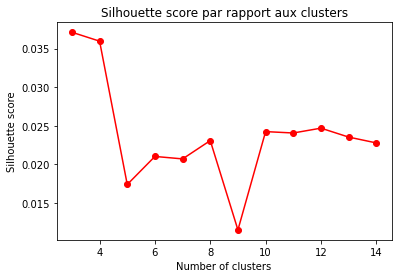

In [ ]:
import matplotlib.pyplot as plt
plt.plot(n_clusters, sc, marker='.', markersize=12, color='red')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score par rapport aux clusters')
plt.show()

In [ ]:
for n, s in zip(n_clusters, ssd):
  print('Number of Clusters = {}, Sum of Squared Distances = {}'.format(n, s))

Number of Clusters = 3, Sum of Squared Distances = 82798.82876841405
Number of Clusters = 4, Sum of Squared Distances = 81165.98160533351
Number of Clusters = 5, Sum of Squared Distances = 79829.2752348082
Number of Clusters = 6, Sum of Squared Distances = 78706.73875648124
Number of Clusters = 7, Sum of Squared Distances = 77788.57984625772
Number of Clusters = 8, Sum of Squared Distances = 77228.3713494911
Number of Clusters = 9, Sum of Squared Distances = 76793.02953151379
Number of Clusters = 10, Sum of Squared Distances = 76252.75409966294
Number of Clusters = 11, Sum of Squared Distances = 75680.05080171574
Number of Clusters = 12, Sum of Squared Distances = 75244.16643930353
Number of Clusters = 13, Sum of Squared Distances = 74753.21428429526
Number of Clusters = 14, Sum of Squared Distances = 74442.86263757604


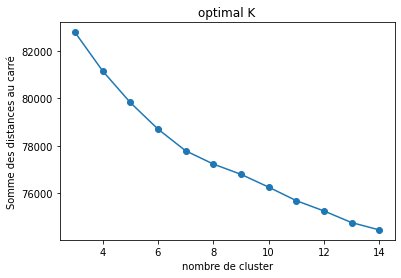

In [ ]:

plt.plot(n_clusters, ssd, marker='.', markersize=12)
plt.xlabel('nombre de cluster')
plt.ylabel('Somme des distances au carré')
plt.title('optimal K')
plt.show()

In [ ]:
#fixer le nombre de custers
#the elbow point in this example is 7
k=7

model = KMeans(n_clusters=k, random_state=42).fit(columns_to_cluster)
pred = model.predict(columns_to_cluster)
print('5 premier clusters: ', model.labels_[:5])

5 premier clusters:  [6 6 2 2 1]


In [ ]:
import copy
df_columns_to_cluster = copy.deepcopy(columns_to_cluster) 


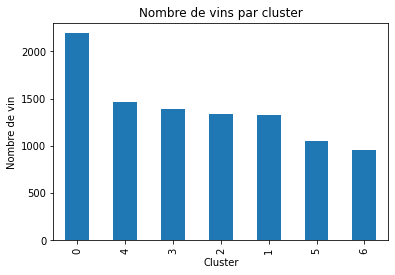

In [ ]:
#Nombre de vins pr cluster 
df_columns_to_cluster['cluster'] = model.labels_

df_columns_to_cluster['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Nombre de vin')
plt.title('Nombre de vins par cluster')
plt.show()

In [ ]:

display(df_columns_to_cluster['cluster'].value_counts())
minor_cluster = df_columns_to_cluster['cluster'].value_counts().tail(1)
print("Quantité de vin dans le plus petit cluster: ", int(minor_cluster.values))

0    2191
4    1467
3    1393
2    1342
1    1332
5    1048
6     953
Name: cluster, dtype: int64

Quantité de vin dans le plus petit cluster:  953


In [ ]:
#Vins en chaque custer affficher que les premières lignes par cluster
df_wine_joined = pd.concat([df,df_columns_to_cluster], axis=1).set_index('cluster')

for cluster in range(k):
  display(df_wine_joined.loc[cluster, ['Wine', 'Year','Score']].sample(frac=1).head(10))

,Wine,Year,Score
cluster,,,
0,ChÃ¢teau Rauzan-SÃ©gla Margaux,2008,90
0,ChÃ¢teau Bois de Rolland Bordeaux SupÃ©rieur,2009,86
0,ChÃ¢teau Brillette Moulis,2011,87
0,ChÃ¢teau Fontenil Fronsac,2015,91
0,ChÃ¢teau Bouscaut Graves,2015,89
0,ChÃ¢teau Haut-Segottes St.-Emilion,2016,87
0,ChÃ¢teau Grand Bouchon MÃ©doc RÃ©vÃ©lations d'...,2012,87
0,ChÃ¢teau Pichon-Longueville Baron Pauillac Les...,2012,87
0,ChÃ¢teau Cantinot Blaye CÃ´tes de Bordeaux,2009,87


,Wine,Year,Score
cluster,,,
1,ChÃ¢teau de Rayne Vigneau Sauternes,2013,94
1,Domaine de la Solitude Pessac-LÃ©ognan White,2010,91
1,ChÃ¢teau RoÃ»mieu-Lacoste Barsac,2009,91
1,ChÃ¢teau La Tour Blanche Sauternes,2006,92
1,SchrÃ¶der & SchÃ¿ler & Co. Sauvignon Blanc Bor...,2016,85
1,ChÃ¢teau Lafon-Rochet Bordeaux RosÃ© Lafon-Roset,2010,88
1,ChÃ¢teau Le Bonnat Graves White,2010,87
1,ChÃ¢teau La Fleur St.-Emilion,2014,89
1,ChÃ¢teau Brane-Cantenac Margaux Baron de Brane,2008,86


,Wine,Year,Score
cluster,,,
2,Arbo Malbec CÃ´tes de Bordeaux,2014,86
2,Maison Bouey Bordeaux ChÃ¢teau Les Marcottes,2011,84
2,ChÃ¢teau Mons Delaunay Blaye,2008,85
2,ChÃ¢teau Sergant Lalande-de-Pomerol,2016,88
2,ChÃ¢teau Fontesteau Haut-MÃ©doc,2014,86
2,ChÃ¢teau Coutet St.-Emilion,2009,89
2,ChÃ¢teau Coutet St.-Emilion,2015,89
2,ChÃ¢teau Roc de Segur Bordeaux,2010,85
2,ChÃ¢teau Magnol Haut-MÃ©doc,2015,88


,Wine,Year,Score
cluster,,,
3,ChÃ¢teau Clerc Milon Pauillac,2001,91
3,Jean Gautreau Haut-MÃ©doc ChÃ¢teau Sociando-Ma...,2003,92
3,Jean Gautreau Haut-MÃ©doc ChÃ¢teau Sociando-Ma...,2001,88
3,ChÃ¢teau Beauregard Pomerol,2000,89
3,ChÃ¢teau d'Arche Sauternes,2003,92
3,ChÃ¢teau LÃ©oville PoyferrÃ© St.-Julien,2004,90
3,ChÃ¢teau Canon-La GaffeliÃ¨re St.-Emilion,2004,91
3,ChÃ¢teau Lafaurie-Peyraguey Sauternes,2007,91
3,ChÃ¢teau d'Aiguilhe CÃ´tes de Castillon,2002,89


,Wine,Year,Score
cluster,,,
4,Gracia St.-Emilion,2011,90
4,ChÃ¢teau Haut-Brion Pessac-LÃ©ognan,2009,98
4,ChÃ¢teau Jean Faure St.-Emilion,2015,92
4,ChÃ¢teau Puy-Blanquet St.-Emilion,2015,89
4,ChÃ¢teau Petit-Village Pomerol,2014,91
4,ChÃ¢teau de Ricaud Cadillac CÃ´tes de Bordeaux,2010,91
4,ChÃ¢teau Beychevelle St.-Julien,2015,93
4,ChÃ¢teau LÃ©oville Barton St.-Julien,2009,95
4,ChÃ¢teau Larrivet Haut-Brion Pessac-LÃ©ognan,2012,89


,Wine,Year,Score
cluster,,,
5,ChÃ¢teau Jean Voisin St.-Emilion,2006,88
5,ChÃ¢teau du Tertre Margaux,2002,81
5,Terra Burdigala St.-Emilion ChÃ¢teau Peyroutas,2006,82
5,Baron Philippe de Rothschild Bordeaux Mouton C...,2006,85
5,ChÃ¢teau Lynch Bages Pauillac,2004,89
5,ChÃ¢teau Haut Gravet St.-Emilion,2001,85
5,ChÃ¢teau Gree Laroque Bordeaux SupÃ©rieur,2001,83
5,ChÃ¢teau Grand-Puy Ducasse Pauillac,2001,88
5,ChÃ¢teau Couronneau Bordeaux SupÃ©rieur CuvÃ©e...,2005,83


,Wine,Year,Score
cluster,,,
6,ChÃ¢teau La Renaissance Pomerol,2016,90
6,Julie Gonet-MÃ©deville Bordeaux SupÃ©rieur Mon...,2016,89
6,ChÃ¢teau Abelyce St.-Emilion,2015,88
6,ChÃ¢teau Capet-Guillier St.-Emilion,2010,89
6,Clos des Menuts St.-Emilion L'Excellence,2016,86
6,ChÃ¢teau Lafont Menaut Pessac-LÃ©ognan,2009,87
6,ChÃ¢teau Montrose St.-EstÃ¨phe,2013,92
6,ChÃ¢teau d'Arcins Haut-MÃ©doc,2013,83
6,Ets. Thunevin St.-Emilion 3 de Valandraud,2009,89


# **Appliquer PCA pour visualiser les clusters**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=42)
wine_pca = pca.fit_transform(columns_to_cluster)
pca.explained_variance_ratio_.sum()

0.12423994006790708

In [ ]:

df_pca = pd.DataFrame(wine_pca, columns=['C1', 'C2', 'C3'])
df_pca['cluster'] = model.labels_
df_pca.head()

,C1,C2,C3,cluster
0,-0.117005,-0.844942,0.155161,6
1,0.098502,-0.666318,0.236165,6
2,-0.439049,-1.024173,-0.212763,2
3,-0.176572,-1.185221,-0.092662,2
4,0.134168,-1.182880,0.451117,1


In [ ]:

sampled_clusters_pca = pd.DataFrame()

for c in df_pca.cluster.unique():
  df_cluster_sampled_pca = df_pca[df_pca.cluster == c].sample(n=int(minor_cluster), random_state=42)
  sampled_clusters_pca = pd.concat([sampled_clusters_pca,df_cluster_sampled_pca], axis=0)
sampled_clusters_pca.cluster.value_counts()

3    953
6    953
2    953
5    953
1    953
4    953
0    953
Name: cluster, dtype: int64

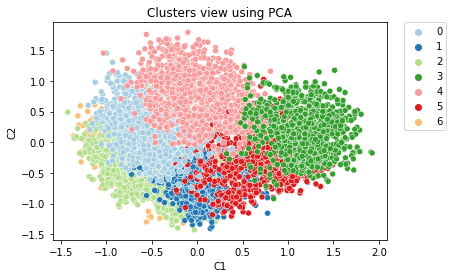

In [ ]:
import seaborn as sns
#Visuaisation en deux dimensions
sns.scatterplot(x='C1', y='C2', hue='cluster', data=sampled_clusters_pca, legend="full", palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using PCA')
plt.show()